In [1]:
from resovit import ResoVit
from utils import custom_collate_fn, train_model, CustomMNIST
import torchvision
from torchvision import transforms
import torch.optim as optim
import torch.nn as nn
import torch

# Autoreload modules:
%load_ext autoreload
%autoreload 2

# Load the encoder of the mae for finetuning:

model = ResoVit(patch_size=4,
num_transformer_layers = 2,
max_length=256, 
img_channels=1,
embedding_dim = 128,
mlp_size=256,
num_heads=2,
attn_dropout=0.1,
embedding_dropout=0.1,
num_classes=10
)

model.load_state_dict(torch.load('encoder.pth'))

# Let's load flowers102 dataset from torchvision:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_dataset = torchvision.datasets.Flowers102(root='./data', split='train', transform=transform, download=True)
test_dataset = torchvision.datasets.Flowers102(root='./data', split='test', transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=custom_collate_fn)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

batch_size = 32

train_dataset = CustomMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,collate_fn=custom_collate_fn,)

test_dataset = CustomMNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False,collate_fn=custom_collate_fn,)



# Loading Cifar-10 dataset:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

batch_size = 32

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,collate_fn=custom_collate_fn,)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False,collate_fn=custom_collate_fn,)

# Define hyperparameters
num_epochs = 10
batch_size = 64
learning_rate = 0.001

# Create model and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), 
                       lr=learning_rate,
                       weight_decay=0.03)

/Users/thomasrochefort/opt/anaconda3/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 25%|██▌       | 42696704/170498071 [00:23<01:09, 1832982.48it/s]


KeyboardInterrupt: 

In [ ]:
train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs,train_log_freq=2,max_grad_norm=1.0)

In [29]:
model

ResoVit(
  (patch_embedding): PatchEmbedding(
    (linear): Linear(in_features=16, out_features=128, bias=True)
  )
  (embedding_dropout): Dropout(p=0.1, inplace=False)
  (positional_embedding): PositionalEmbedding()
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=256, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
     

In [2]:
from mae import MAE

In [20]:
model = ResoVit(patch_size=32,
num_transformer_layers = 2,
max_length=1024, 
img_channels=3,
embedding_dim = 128,
mlp_size=256,
num_heads=2,
attn_dropout=0.1,
embedding_dropout=0.1,
)

mae = MAE(decoder_dim=128, encoder=model)
mae.enc_to_dec

Identity()

In [12]:
from torchinfo import summary
summary(mae, (1,3,32,32))

/Users/thomasrochefort/opt/anaconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/transformer.py:506: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666646991213/work/aten/src/ATen/native/transformers/attention.cpp:128.)
  return torch._transformer_encoder_layer_fwd(


Layer (type:depth-idx)                             Output Shape              Param #
MAE                                                [1, 256, 48]              --
├─Linear: 1-1                                      [1, 256, 128]             6,272
├─PositionalEmbedding: 1-2                         [1, 256, 128]             32,768
├─ResoVit: 1-3                                     --                        40,586
│    └─TransformerEncoder: 2-1                     [1, 256, 128]             --
│    │    └─ModuleList: 3-1                        --                        264,960
├─Identity: 1-4                                    [1, 256, 128]             --
├─PositionalEmbedding: 1-5                         [1, 256, 128]             32,768
├─TransformerEncoder: 1-6                          [1, 256, 128]             --
│    └─ModuleList: 2-2                             --                        --
│    │    └─TransformerEncoderLayer: 3-2           [1, 256, 128]             83,136
├─Linear: 1

In [28]:
from resovit import ResoVit
from utils import custom_collate_fn, train_model
import torchvision
from torchvision import transforms
import torch.optim as optim
import torch.nn as nn
import torch
from utils import CustomMNIST
import torch.nn.functional as F


# Let's load flowers102 dataset from torchvision:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256,256)),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_dataset = torchvision.datasets.Flowers102(root='./data', split='train', transform=transform, download=True)
test_dataset = torchvision.datasets.Flowers102(root='./data', split='test', transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True,)#collate_fn=custom_collate_fn)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, )#collate_fn=custom_collate_fn)



In [37]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

batch_size = 32


train_dataset = CustomMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,collate_fn=custom_collate_fn,)

test_dataset = CustomMNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False,collate_fn=custom_collate_fn,)



In [29]:
# Define hyperparameters
num_epochs = 10
batch_size = 64
learning_rate = 0.001
optimizer = optim.Adam(mae.parameters(), lr=learning_rate)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for epoch in range(num_epochs):
    mae.train()
    running_loss_train = 0.0
    running_acc_train = 0.0
    for i, (images, labels) in enumerate(train_loader):
        if isinstance (images, list): 
            print('list!')
            images = [img.to(device) for img in images]
        else:
            images = images.to(device)
            
        labels = labels.to(device) # Move to device
        optimizer.zero_grad()
        predictions, actuals,x ,attn_masks = mae(images)
        loss = F.mse_loss(predictions,actuals)
        print(loss)
        loss.backward()
        optimizer.step()
        running_loss_train += loss.item()
        if i % 10 == 0 and i > 0:
            print(f"Epoch {epoch} - Batch {i} - Loss: {running_loss_train/(i):.4f}")
        break

    #after each epoch, evaluate the model on the test set:
    #mae.eval()
    #running_loss_test = 0.0
    #running_acc_test = 0.0
    #for i, (images, labels) in enumerate(test_loader):
    #    images = [img.to(device) for img in images]
    #    labels = labels.to(device)
    #    predictions, actuals,x ,attn_masks = mae(images)
    #    loss = F.mse_loss(predictions,actuals)
    #    running_loss_test += loss.item()
    
   # print(f"Epoch {epoch} -Test Loss: {running_loss_test/(i):.4f}")
    

tensor(0.0841, grad_fn=<MseLossBackward0>)
tensor(0.0849, grad_fn=<MseLossBackward0>)
tensor(0.0762, grad_fn=<MseLossBackward0>)
tensor(0.0707, grad_fn=<MseLossBackward0>)
tensor(0.0698, grad_fn=<MseLossBackward0>)
tensor(0.0812, grad_fn=<MseLossBackward0>)
tensor(0.0802, grad_fn=<MseLossBackward0>)
tensor(0.0798, grad_fn=<MseLossBackward0>)
tensor(0.0760, grad_fn=<MseLossBackward0>)
tensor(0.0671, grad_fn=<MseLossBackward0>)


In [13]:
# Save the encoder of the mae for finetuning:
torch.save(mae.encoder.state_dict(), 'encoder.pth')

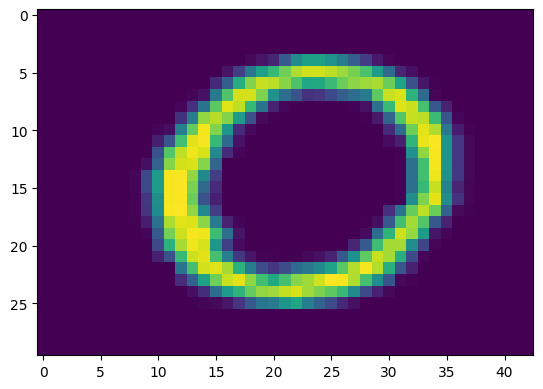

In [44]:
import matplotlib.pyplot as plt
plt.imshow(images[1].permute(1,2,0).detach().cpu().numpy())

In [45]:
img_dim=images[1].shape
patch_size=4
img_channel =1

if img_dim[1] % patch_size != 0:
    pad_h = patch_size - img_dim[1] % patch_size
else:
    pad_h = 0
if img_dim[2] % patch_size != 0:
    pad_w = patch_size - img_dim[2] % patch_size
else:
    pad_w = 0

actual_img_dim = (img_dim[1] + pad_h, img_dim[2] + pad_w)
actual_img_dim

(32, 44)

In [46]:
predictions, actuals,x ,attn_masks = mae(images[1].unsqueeze(0))
pred_img = predictions[0][attn_masks[0].bool()]
actuals = actuals[0][attn_masks[0].bool()]

In [47]:
patch_per_height = int(actual_img_dim[0]/patch_size)
patch_per_width = int(actual_img_dim[1]/patch_size)

# pred_img is currently in shape (num_patches,patch_size*patch_size*img_channel)
# I want to reformat it as (patch_per_height,patch_per_width,patch_size,patch_size,img_channel)
pred_img = pred_img.view(patch_per_height,patch_per_width,int(patch_size),int(patch_size),img_channel)
pred_img = pred_img.permute(0,2,1,3,4).contiguous()
pred_img = pred_img.view(actual_img_dim[0],actual_img_dim[1],img_channel)

actuals = actuals.view(patch_per_height,patch_per_width,int(patch_size),int(patch_size),img_channel)
actuals = actuals.permute(0,2,1,3,4).contiguous()
actuals = actuals.view(actual_img_dim[0],actual_img_dim[1],img_channel)


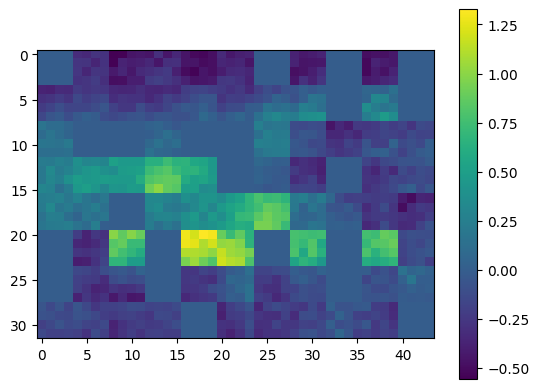

In [48]:
plt.imshow(pred_img.detach().cpu().numpy())
plt.colorbar()

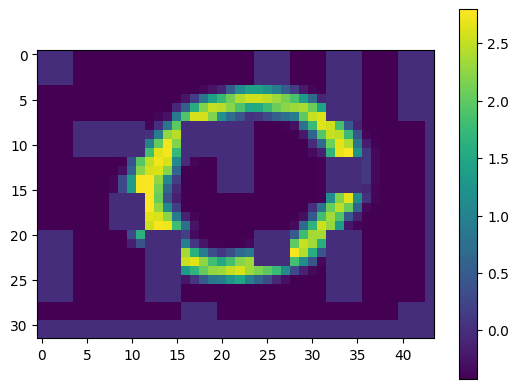

In [49]:
plt.imshow(actuals.detach().cpu().numpy())
plt.colorbar()

In [20]:
#Calculate the mse between the actuals and the predictions:
mse = F.mse_loss(pred_img,actuals)
mse

tensor(0.3179, grad_fn=<MseLossBackward0>)

In [21]:
# Load the encoder of the mae for finetuning:

model = ResoVit(patch_size=4,
num_transformer_layers = 2,
max_length=256, 
img_channels=1,
embedding_dim = 128,
mlp_size=256,
num_heads=2,
attn_dropout=0.1,
embedding_dropout=0.1,
)

model.load_state_dict(torch.load('encoder.pth'))

<All keys matched successfully>

In [29]:
model.transformer_encoder.layers

ModuleList(
  (0): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
    )
    (linear1): Linear(in_features=128, out_features=256, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=256, out_features=128, bias=True)
    (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (1): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
    )
    (linear1): Linear(in_features=128, out_features=256, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=256, out_features=128, bias=True)
    (norm1): LayerNorm((128,), eps=1e-05, elementwise_

In [30]:
# Freeze all model parameters and then unfreeze only the last transformer_encoder.layers and the classifier:
for param in model.parameters():
    param.requires_grad = False

for param in model.transformer_encoder.layers[-1].parameters():
    param.requires_grad = True

for param in model.classifier.parameters():
    param.requires_grad = True

In [31]:

# Define hyperparameters
num_epochs = 10
batch_size = 64
learning_rate = 0.001

# Create model and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), 
                       lr=learning_rate,
                       weight_decay=0.03)

In [32]:
train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs,train_log_freq=10,max_grad_norm=1.0)

Epoch 0 - Batch 10 - Loss: 2.5670 - Accuracy: 0.1594
Epoch 0 - Batch 20 - Loss: 2.4054 - Accuracy: 0.1688
Epoch 0 - Batch 30 - Loss: 2.3225 - Accuracy: 0.1833
Epoch 0 - Batch 40 - Loss: 2.2605 - Accuracy: 0.2000
Epoch 0 - Batch 50 - Loss: 2.2224 - Accuracy: 0.2019
Epoch 0 - Batch 60 - Loss: 2.2018 - Accuracy: 0.2083
Epoch 0 - Batch 70 - Loss: 2.1906 - Accuracy: 0.2107
Epoch 0 - Batch 80 - Loss: 2.1815 - Accuracy: 0.2102
Epoch 0 - Batch 90 - Loss: 2.1683 - Accuracy: 0.2135
Epoch 0 - Batch 100 - Loss: 2.1636 - Accuracy: 0.2131
Epoch 0 - Batch 110 - Loss: 2.1631 - Accuracy: 0.2119
Epoch 0 - Batch 120 - Loss: 2.1582 - Accuracy: 0.2107
Epoch 0 - Batch 130 - Loss: 2.1516 - Accuracy: 0.2137
Epoch 0 - Batch 140 - Loss: 2.1520 - Accuracy: 0.2121
Epoch 0 - Batch 150 - Loss: 2.1504 - Accuracy: 0.2113
Epoch 0 - Batch 160 - Loss: 2.1453 - Accuracy: 0.2127
Epoch 0 - Batch 170 - Loss: 2.1397 - Accuracy: 0.2143
Epoch 0 - Batch 180 - Loss: 2.1349 - Accuracy: 0.2167
Epoch 0 - Batch 190 - Loss: 2.1303 - 

KeyboardInterrupt: 

In [13]:
import torch
from vit_pytorch import ViT

v = ViT(
    image_size = 1024,
    patch_size = 32,
    num_classes = 1000,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1
)

img = torch.randn(1, 3, 512, 512) # <-- not a square

preds = v(img) # (1, 1000)

In [4]:
preds.shape

torch.Size([1, 1000])

In [14]:
# remove the classification head
import torch.nn as nn
v.mlp_head = nn.Identity()

In [15]:
preds = v(img) # (1, 1000)
preds.shape

torch.Size([1, 1024])

In [22]:
img = torch.randn(1, 3, 1024, 1024) # <-- not a square

v.to_patch_embedding(img).shape

torch.Size([1, 1024, 1024])

In [23]:
v

ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=32, p2=32)
    (1): Linear(in_features=3072, out_features=1024, bias=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer): Transformer(
    (layers): ModuleList(
      (0): ModuleList(
        (0): PreNorm(
          (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fn): Attention(
            (attend): Softmax(dim=-1)
            (dropout): Dropout(p=0.1, inplace=False)
            (to_qkv): Linear(in_features=1024, out_features=3072, bias=False)
            (to_out): Sequential(
              (0): Linear(in_features=1024, out_features=1024, bias=True)
              (1): Dropout(p=0.1, inplace=False)
            )
          )
        )
        (1): PreNorm(
          (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fn): FeedForward(
            (net): Sequential(
              (0): Linear(in_features=1024, out_feature